# LINGUAGEM NATURAL E INTELIGÊNCIA ARTIFICIAL


## MODELOS DE CLASSIFICAÇÃO AUTOMÁTICA DE TEXTO

Carlos Catalão Alves  
13 Maio, 2018

#### Aplicação:

Obter e comparar os resultados de diferentes modelos, usados em Aprendizagem Máquina, para classificação automática de textos. 
  

Os modelos utilizados são:  

1. k-Nearest Neighbor (kNN)   
2. SGDClassifier  
3. Perceptron  
4. Naive Bayes (modelos Multinominal e Bernoulli)  

Em cada um dos modelos será possível observar um relatório detalhado, incluindo diversos dados métricos. É produzido também um gráfico comparativo dos diferentes modelos. 

Os dados são lidos num ficheiro csv, delimitado por tabs (textos_treino.csv), e são divididos em séries para treino e para teste. Os resultados são obtidos a partir de uma comparação entre as classificações previstas pelos modelos treinados e as classificações reais à partida.


#### Livrarias python

In [21]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

#### Livrarias NLTK - Natural Langage Processing Toolkit

In [22]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

#### Livrarias SciKit Learn

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 

#### Variáveis

In [24]:
report = []
categorias = [ "Astronomia","Biologia","Geologia","Engenharia","Patrimonio"]

#### Funções

In [25]:
def tokenizar(texto, stemizar=True, lingua="portuguese"):

    # Usa o SnowballStemmer do NLTK para português
    stemizador = SnowballStemmer(lingua)

    # Tokeniza por frase e por palavra
    tokens = [word.lower() for frase in nltk.sent_tokenize(texto) for word in nltk.word_tokenize(frase)]
    
    # Aplica NLTK stopwords 
    stop_words_pt = set(stopwords.words(lingua)) 
    
    # Filtra as palavras que não têm letras, e as que estão na lista de stopwords
    tokens_filtrados = []
    for token in tokens:
        if re.search("[a-zA-Z]", token):
            if token not in stopwords.words(lingua):
                if token not in stop_words_pt:
                    tokens_filtrados.append(token)
                if stemizar:
                    stems = [stemizador.stem(token) for token in tokens_filtrados]
    return stems


In [26]:
# Relatório de classificação
def reporta(clf, modelo):
    
    print("\nModelo: %s" % modelo)
    print('_' * 80)

    clf.fit(X_treino, y_treino)
    previsao = clf.predict(X_teste)
    score = metrics.accuracy_score(y_teste, previsao)
    print("\nacurancy: %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("\nTermos mais relevantes em cada categoria:\n")
        for i, label in enumerate(categorias):
            top10 = np.argsort(clf.coef_[i])[-10:]
            print(trim("%s: \t %s" % (label, "  ".join(termos[top10]))))
        print()


    print("\nRelatório:")
    print(metrics.classification_report(y_teste, previsao, target_names=categorias))
    print("\nconfusion matrix:")
    print(metrics.confusion_matrix(y_teste, previsao))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score

In [27]:
def trim(s):
    # Assegura apresentação dentro dos limites das 80 colunas do terminal
    return s if len(s) <= 80 else s[:77] + "..."

#### Importa ficheiro csv com textos

In [28]:
# Importando os dados de treino
dados = pd.read_csv('textos_treino.csv', delimiter = '\t', quoting = 3)

#### Partição dos dados em treino e teste

In [29]:
X = dados["texto"]
y = dados["target"]

# Dividir documentos em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print("%d documentos de treino" % (len(X_treino)))
print("%d documentos de teste" % (len(X_teste)))
print("%d categorias" % len(categorias))
print()

212 documentos de treino
53 documentos de teste
5 categorias



#### Dados de treino: Pré-processamento e vectorização 

In [30]:
print("A extrair termos de %d documentos de treino ..."  % (len(X_treino)))
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', tokenizer=tokenizar)
X_treino = vectorizer.fit_transform(X_treino)
duracao = time() - t0
print("Termos extraídos em: {0:.1f}s".format(duracao))
print("documentos: %d, termos: %d" % X_treino.shape)
print()

A extrair termos de 212 documentos de treino ...
Termos extraídos em: 50.5s
documentos: 212, termos: 3940



#### Dados de teste: Pré-processamento e vectorização 

In [31]:
print("A extrair termos de %d documentos de teste ..."  % (len(X_teste)))
t0 = time()
X_teste = vectorizer.transform(X_teste)
duracao = time() - t0
print("Termos extraídos em: {0:.1f}s".format(duracao))
print("documentos: %d, termos: %d" % X_teste.shape)
print()

A extrair termos de 53 documentos de teste ...
Termos extraídos em: 14.7s
documentos: 53, termos: 3940



#### Associar vectores aos termos originais

In [32]:
# Ligar cada vector ao termo original, para mostrar os mais relevantes
termos = vectorizer.get_feature_names()
if termos:
    termos = np.asarray(termos)

### Aplicar os modelos 

#### Perceptron

In [33]:
from sklearn.linear_model import Perceptron
report.append(reporta(Perceptron(max_iter=50), "Perceptron"))


Modelo: Perceptron
________________________________________________________________________________

acurancy: 0.849

Termos mais relevantes em cada categoria:

Astronomia: 	 astronóm  observ  ecomus  astrofotograf  astronom  telescópi  m...
Biologia: 	 serr  humaniz  cogumel  ecossistem  paisag  mat  faun  flor  prát...
Geologia: 	 inter  ric  fóss  ilha  tip  testemunh  regiã  sediment  roch  ge...
Engenharia: 	 viadut  project  imóvel  metr  acess  siemens  utent  radiaçã  ...
Patrimonio: 	 jog  síti  pertencent  investig  arqueolog  arqueólog  curs  év...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      0.90      0.95        10
   Biologia       0.76      0.93      0.84        14
   Geologia       0.83      0.77      0.80        13
 Engenharia       0.83      0.71      0.77         7
 Patrimonio       0.89      0.89      0.89         9

avg / total       0.86      0.85      0.85        53


confusion matrix:
[[ 9  1  0  0  0]
 [ 0 13  

#### k-Nearest Neighbor (kNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
report.append(reporta(KNeighborsClassifier(n_neighbors=10), "KNeighbors Classifier"))


Modelo: KNeighbors Classifier
________________________________________________________________________________

acurancy: 0.906

Relatório:
             precision    recall  f1-score   support

 Astronomia       0.91      1.00      0.95        10
   Biologia       0.88      1.00      0.93        14
   Geologia       0.91      0.77      0.83        13
 Engenharia       1.00      0.86      0.92         7
 Patrimonio       0.89      0.89      0.89         9

avg / total       0.91      0.91      0.90        53


confusion matrix:
[[10  0  0  0  0]
 [ 0 14  0  0  0]
 [ 1  1 10  0  1]
 [ 0  1  0  6  0]
 [ 0  0  1  0  8]]



#### SGDClassifier

In [35]:
from sklearn.linear_model import SGDClassifier
report.append(reporta(SGDClassifier(alpha=.0001, max_iter=50, penalty="elasticnet"), "SGDC Classifier"))


Modelo: SGDC Classifier
________________________________________________________________________________

acurancy: 0.868

Termos mais relevantes em cada categoria:

Astronomia: 	 observ  saturn  estrel  lua  constel  céu  astronóm  sol  teles...
Biologia: 	 ecolog  organ  plant  aves  anim  habitats  faun  ecossistem  flo...
Geologia: 	 calcári  formaçã  geomorfológ  fóss  pedreir  regiã  ilha  sedime...
Engenharia: 	 imóvel  produçã  circul  estrad  tráfeg  sul  radiaçã  capac  s...
Patrimonio: 	 d.  restaur  defes  cultural  milit  sécul  arqueólog  muralh  ...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      0.90      0.95        10
   Biologia       0.80      0.86      0.83        14
   Geologia       0.79      0.85      0.81        13
 Engenharia       1.00      0.86      0.92         7
 Patrimonio       0.89      0.89      0.89         9

avg / total       0.88      0.87      0.87        53


confusion matrix:
[[ 9  1  0  0  0]
 [ 0

#### NAIVE BAYES

In [36]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

#### Multinomial

In [37]:
report.append(reporta(MultinomialNB(alpha=.01), "MultinomialNB"))


Modelo: MultinomialNB
________________________________________________________________________________

acurancy: 0.887

Termos mais relevantes em cada categoria:

Astronomia: 	 lua  planet  sol  constel  astronóm  céu  estrel  astronom  tel...
Biologia: 	 conhec  conserv  aves  import  flor  faun  dest  biodivers  activ...
Geologia: 	 visit  formaçã  aspect  histór  observ  conhec  regiã  sediment  ...
Engenharia: 	 circul  tratament  inform  construçã  centr  tráfeg  sistem  ca...
Patrimonio: 	 defes  monument  histór  ciênc  muralh  sécul  conhec  milit  v...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      0.90      0.95        10
   Biologia       0.82      1.00      0.90        14
   Geologia       0.91      0.77      0.83        13
 Engenharia       1.00      0.86      0.92         7
 Patrimonio       0.80      0.89      0.84         9

avg / total       0.90      0.89      0.89        53


confusion matrix:
[[ 9  1  0  0  0]
 [ 0 1

#### Bernoulli

In [38]:
report.append(reporta(BernoulliNB(alpha=.01), "BernoulliNB"))


Modelo: BernoulliNB
________________________________________________________________________________

acurancy: 0.887

Termos mais relevantes em cada categoria:

Astronomia: 	 astronóm  particip  constel  planet  céu  sobr  estrel  astrono...
Biologia: 	 form  import  particip  divers  observ  pod  dest  conhec  activ ...
Geologia: 	 acçã  histór  sediment  onde  regiã  roch  visit  conhec  observ ...
Engenharia: 	 conhec  permit  activ  através  centr  construçã  sistem  insta...
Patrimonio: 	 nest  acçã  ciênc  milit  sobr  sécul  histór  conhec  visit  c...


Relatório:
             precision    recall  f1-score   support

 Astronomia       0.90      0.90      0.90        10
   Biologia       0.93      0.93      0.93        14
   Geologia       0.83      0.77      0.80        13
 Engenharia       1.00      1.00      1.00         7
 Patrimonio       0.80      0.89      0.84         9

avg / total       0.89      0.89      0.89        53


confusion matrix:
[[ 9  1  0  0  0]
 [ 0 13 

#### GRÁFICO COMPARATIVO

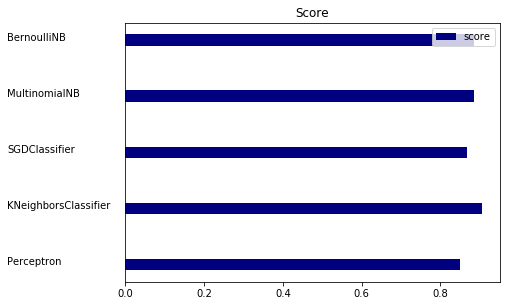

In [39]:
indices = np.arange(len(report))
report = [[x[i] for x in report] for i in range(2)]
clf_names, score = report
plt.figure(figsize=(8, 4))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)
plt.show()